In [104]:
%load_ext autoreload
%autoreload 2
#------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
#------------------------------------------------
from funciones import read_plot_mesh
from funciones import area_tri
from funciones import compute_potential_field
from funciones import plot_potential_field
from funciones import green_pot_2d
from funciones import green_field_2d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Estrella

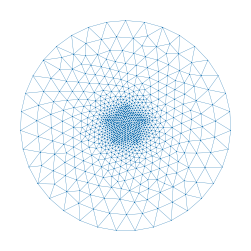

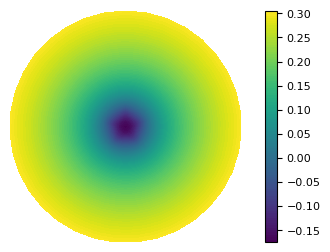

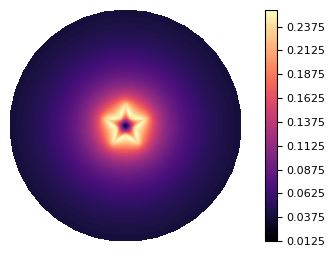

In [105]:
pts, tris_planet,tris = read_plot_mesh("files/star_planet.msh")
potential, field = compute_potential_field(pts, tris_planet, area_tri)
plot_potential_field(pts, tris, potential, field)

# Carga puntual

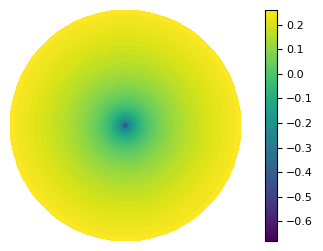

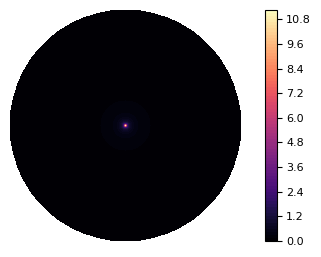

In [ ]:
radius = 5
y, x = radius * np.mgrid[-1:1:500j, -1:1:500j]
pt_x = 0
pt_y = 0
r = np.sqrt((pt_x - x)**2 + (pt_y - y)**2)

# Aplicar la máscara circular
mask = r <= radius

G = green_pot_2d(r)
G[~mask] = np.nan  

vec = np.array([-x, -y])
unit_vec = vec / r
Ex, Ey = green_field_2d(r, unit_vec)
field = np.stack((Ex, Ey), axis=-1)
field[~mask] = np.nan  


plt.figure()
plt.contourf(x, y, G,levels=100)
plt.colorbar()
plt.axis("image")
plt.axis("off")
plt.show()

plt.figure()
plt.contourf(x, y, np.linalg.norm(field, axis=-1),levels=100, cmap="magma")
plt.colorbar()
plt.axis("image")
plt.axis("off")
plt.show()

# Carga distribuida circularmente